<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Lab_5/Laboratorio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A first look at a neural network

Problem: The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 pixels) into their 10 categories (0 through 9).

We’ll use the MNIST dataset, It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.


In [ ]:
from keras.datasets import mnist
#(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(train_data, train_data_labels), (test_data, test_data_labels) = mnist.load_data()

## Let’s look at the training data:

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
len(train_data_labels)

60000

In [ ]:
train_data_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

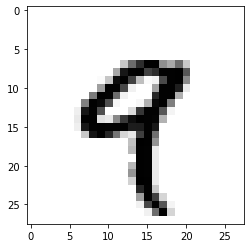

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[4], cmap=plt.cm.binary)
plt.show()

In [ ]:
train_data_labels[4]

9

## And here’s the test data

In [ ]:
test_data.shape

(10000, 28, 28)

In [ ]:
len(test_data_labels)

10000

In [ ]:
test_data_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Validation dataset

In [ ]:
# Validación
val_images = train_data[:10000,:]
val_labels = train_data_labels[:10000]
print("Validation: ", val_images.shape)

#Training
train_images = train_data[10000:,:]
train_labels = train_data_labels[10000:]
print("Training: ", train_images.shape)

#Testing
test_images = test_data
test_labels = test_data_labels
print("Testing: ", train_images.shape)

Validation:  (10000, 28, 28)
Training:  (50000, 28, 28)
Testing:  (50000, 28, 28)


## The network architecture

#### Layers extract representations out of the data fed into them — hopefully
#### Most of deep learning consists of chaining together simple layers that will implement a form of progressive data distillation
#### A deep-learning model is like a sieve for data processing, made of a succession of increasingly refined data filters — the layers

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Here, our model consists of a sequence of two Dense layers, which are densely connected (also
# called fully connected) neural layers. The second (and last) layer is a 10-way softmax
# classification layer, which means it will return an array of 10 probability scores (summing to 1).

To make the model ready for training, we need to pick three more things, as part of the compilation step:
* An optimizer — The mechanism through which the model will update itself based on the training data it sees, so as to improve its performance.
* A loss function — How the model will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
* Metrics to monitor during training and testing — Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

# The compilation step

The compile() method configures the training process

<code>model.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])</code>


![compiler.png](compiler.png)

In [ ]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

### Normalization and flattened - Why we need normalization?

Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [ ]:
train_images = train_images.reshape((50000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
val_images = val_images.reshape((10000, 28 * 28))
val_images = val_images.astype('float32') / 255

In [ ]:
train_images.shape

(50000, 784)

#### We’re now ready to train the model, which in Keras is done via a call to the model’s fit method

In [ ]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128 , validation_data=(val_images, val_labels))

Epoch 1/20
391/391 [==============================] - 1s 3ms/step - loss: 9.4115e-05 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 0.9788
Epoch 2/20
391/391 [==============================] - 1s 4ms/step - loss: 2.1443e-04 - accuracy: 1.0000 - val_loss: 0.1354 - val_accuracy: 0.9828
Epoch 3/20
391/391 [==============================] - 1s 3ms/step - loss: 1.1277e-04 - accuracy: 1.0000 - val_loss: 0.1412 - val_accuracy: 0.9823
Epoch 4/20
391/391 [==============================] - 1s 3ms/step - loss: 4.7237e-05 - accuracy: 1.0000 - val_loss: 0.1429 - val_accuracy: 0.9826
Epoch 5/20
391/391 [==============================] - 1s 3ms/step - loss: 1.1889e-04 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9817
Epoch 6/20
391/391 [==============================] - 1s 4ms/step - loss: 1.2775e-05 - accuracy: 1.0000 - val_loss: 0.1443 - val_accuracy: 0.9822
Epoch 7/20
391/391 [==============================] - 1s 3ms/step - loss: 8.8031e-05 - accuracy: 1.0000 - val_loss: 0.1513 -

#### Two quantities are displayed during training:
* the loss of the model over the training data}
* the accuracy of the model over the training data

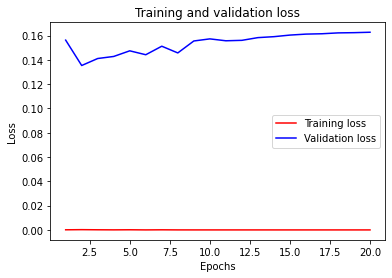

In [ ]:
## Plotting the training and validation loss:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

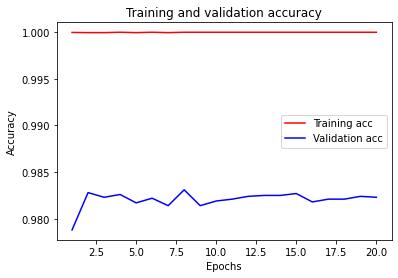

In [ ]:
## Plotting the training and validation accuracy:
##----------------------------------------------
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

![Overfitting.png](images/OVerfitting.png)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.05811888,  0.04509299,  0.00270712, ...,  0.03765269,
         -0.06040028,  0.05417474],
        [ 0.02577528, -0.00878131,  0.05641852, ...,  0.03059413,
         -0.02965935, -0.0667793 ],
        [ 0.00714118, -0.03349832, -0.00773904, ..., -0.03689748,
         -0.06007392,  0.04917642],
        ...,
        [-0.04498671, -0.00861797,  0.05772537, ..., -0.00535517,
         -0.03892407, -0.04380159],
        [ 0.0244019 ,  0.04716511,  0.05790272, ..., -0.02817658,
          0.02885389,  0.01668351],
        [-0.01397143,  0.04874928,  0.05514184, ..., -0.06795844,
          0.03288513, -0.05946378]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(512,) dtype=float32, numpy=
 array([-0.06679834,  0.09521975, -0.0792907 , -0.10710454,  0.02362659,
         0.00886257,  0.02669915, -0.00122225, -0.0487694 , -0.0772546 ,
        -0.07648868,  0.02510928, -0.07121716, -0.065308  , -0.09568981,
    

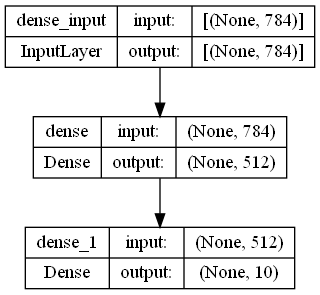

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, "digits_classifier.png", show_shapes=True)

# Using the model to make predictions

In [ ]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 16ms/step


array([1.8369069e-20, 7.0609919e-31, 7.3976148e-19, 1.3016166e-15,
       3.2866518e-29, 9.9465213e-21, 2.5660109e-37, 1.0000000e+00,
       7.0083507e-21, 5.7638051e-16], dtype=float32)

Each number of index i in that array corresponds to the probability that digit image test_digits[0] belong to class i.

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

1.0

In [ ]:
test_labels[0]

7

### We can check that the test label agrees:

In [ ]:
test_labels[0]

7

# Evaluating the model on new data

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.1340 - accuracy: 0.9812
test_acc: 0.9811999797821045


# Data representations for neural networks

* In the previous example, we started from data stored in multidimensional NumPy arrays, also called **tensors**.
* In general, all current machine-learning systems use tensors as their basic data structure.
* You may be already familiar with matrices, which are rank-2 tensors: tensors are a **generalization of matrices to an arbitrary number of dimensions** (note that in the context of tensors, a dimension is often called an **axis**).

### Scalars (rank-0 tensors)

In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

* A tensor that contains only one number is called a **scalar** or **rank-0 tensor**.
* In NumPy, a float32 or float64 number is a scalar tensor (or **scalar array**).
* You can display the number of axes of a NumPy tensor via the ndim attribute.
* The number of axes of a tensor is also called its rank.

### Vectors (rank-1 tensors)

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

* This vector has five entries and so is called a 5-dimensional vector.
* Don’t confuse a 5D vector with a 5D tensor!.
* **Dimensionality** can denote either the number of entries along a specific axis (as in the case of our 5D vector) or the number of axes in a tensor (such as a 5D tensor), which can be confusing at times.

### Matrices (rank-2 tensors)

* An array of vectors is a matrix, or rank-2 tensor, or 2D tensor. A matrix has two axes (often referred to rows and columns).

In [ ]:
x = np.array([[5, 78, 2, 34, 0],
            [6, 79, 3, 35, 1],
            [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [ ]:
x.ndim

2

### Rank-3 tensors and higher-rank tensors

* If you pack such matrices in a new array, you obtain a rank-3 tensor (or 3D tensor), which you can visually interpret as a cube of numbers. Following is a NumPy rank-3 tensor:

In [ ]:
x = np.array([[[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]],
                [[5, 78, 2, 34, 0],
                [6, 79, 3, 35, 1],
                [7, 80, 4, 36, 2]]])
x.ndim

3

* In deep learning, you’ll generally manipulate tensors with ranks 0 to 4, although you may go up to 5 if you process video data.

### Key attributes

A tensor is defined by three key attributes:
* **Number of axes (rank)** — For instance, a rank-3 tensor has three axes, and a matrix has two axes. This is also called the tensor’s **ndim** in Python libraries such as NumPy or TensorFlow.
* **Shape** — This is a tuple of integers that describes how many dimensions the tensor has along each axis. For instance, the previous matrix example has shape (3, 5), and the rank-3 tensor example has shape (3, 3, 5).
* **Data type (usually called dtype in Python libraries)** — This is the type of the data contained in the tensor; for instance, a tensor’s type could be float16, float32, float64, uint8, and so on. In TensorFlow, you are also likely to come across string tensors

To make this more concrete, let’s look back at the data we processed in the MNIST example. First, we load the MNIST dataset:

In [ ]:
(train_imagesORI, train_labelsORI), (test_imagesORI, test_labelsORI) = mnist.load_data()

In [ ]:
print(train_imagesORI.ndim)

3


In [ ]:
print(train_imagesORI.shape)

(60000, 28, 28)


#### So what we have here is a rank-3 tensor of 8-bit integers. More precisely, it’s an array of 60,000 matrices of 28 × 28 integers. Each such matrix is a grayscale image, with coefficients between 0 and 255.

After reshape

In [ ]:
print(train_images.ndim)

2


In [ ]:
print(train_images.shape)

(50000, 784)


# Manipulating tensors in NumPy

### Tensor slicing

In [ ]:
my_slice = train_imagesORI[10:100]
print(my_slice.shape)

(90, 28, 28)


In [ ]:
# It’s equivalent to this more detailed notation
my_slice = train_imagesORI[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
# It’s equivalent to this more detailed notation
my_slice = train_imagesORI[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
# What is the shape after the following slicing?
my_slice = train_imagesORI[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

### Data batches

* In all data tensors you’ll come across in deep learning will be the samples axis (sometimes called the samples dimension). In the MNIST example, samples are images of digits.
*  In addition, deep-learning models don’t process an entire dataset at once; rather, they break the data into small batches.

In [ ]:
# Concretely, here’s one batch of our MNIST digits, with batch size of 128:
batch = train_images[:128] #first batch
batch = train_images[128:256] #second batch

In [ ]:
# And the nth batch:
n = 3
batch = train_images[128 * n:128 * (n + 1)]

* When considering such a batch tensor, the first axis (axis 0) is called the batch axis or batch dimension. This is a term you’ll frequently encounter when using Keras and other deep-learning libraries.

### Real-world examples of data tensors

The data you’ll manipulate will almost always fall into one of the following categories:
* Vector data — rank-2 tensors of shape (samples, features)
* Timeseries data or sequence data — rank-3 tensors of shape (samples, timesteps, features)
* Images — rank-4 tensors of shape (samples, height, width, channels) or (samples, channels, height, width)
* Video — rank-5 tensors of shape (samples, frames, height, width, channels) or (samples, frames, channels, height, width)

Vector data: A dataset of text documents, where we represent each document by the counts of how
many times each word appears in it (out of a dictionary of 20,000 common words).![vector_words.jpeg](images/vector_words.jpeg)

Time Series:
![Timeseriesdata.png](images/timeseriesdata.png)

Images:  ![images_repre.png](images/images_repre.png)

# The gears of neural networks: tensor operations

In our initial example, we were building our model by stacking Dense layers on top of each
other. A Keras layer instance looks like this:

**keras.layers.Dense(512, activation='relu')**

Specifically, the function is as follows (where W is a matrix and b is a vector, both attributes of the layer):

**output = relu(dot(W, input) + b)**

In [ ]:
# Element-wise operations
def naive_relu(x):
    assert len(x.shape) == 2 #x is a rank-2 NumPy tensor.
    x = x.copy()  #Avoid overwriting the input tensor.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
def naive_add(x, y):
    assert len(x.shape) == 2 #x and y are rank-2 NumPy tensors.
    assert x.shape == y.shape
    x = x.copy()  #Avoid overwriting the input tensor.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

* The above functions are not optimized.
* In practice, when dealing with NumPy arrays, these operations are available as well-optimized built-in NumPy functions, which themselves delegate the heavy lifting to a Basic Linear Algebra Subprograms (BLAS) implementation.
* BLAS are low-level, highly parallel, efficient tensor-manipulation routines that are typically implemented in Fortran or C.

In [ ]:
import numpy as np
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print('Took: %.2f s' % (time.time() - t0))

Took: 1.18 s


In [ ]:
#correct way
t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print('Took: %.2f s' % (time.time() - t0))

Took: 0.00 s


In [ ]:
x.shape

(20, 100)

## Tensor product


In [ ]:
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)
print(x,y,z)

[0.17372663 0.0264011  0.2273696  0.30150137 0.70444335 0.61247062
 0.89867467 0.64623836 0.22725018 0.39813829 0.74653353 0.31701991
 0.20048027 0.33719906 0.0380097  0.22659746 0.71667711 0.56255948
 0.79813784 0.10360243 0.16471718 0.13758667 0.33883356 0.58709061
 0.16284479 0.23504205 0.98923819 0.39330715 0.40516208 0.51250127
 0.36771752 0.00962664] [0.08161824 0.57176599 0.46581249 0.44146894 0.33856379 0.97520302
 0.23747566 0.84230994 0.97596178 0.79037291 0.06668226 0.83755609
 0.00175777 0.13319825 0.99291098 0.54470979 0.38439961 0.67782061
 0.44887526 0.84201449 0.33771622 0.51852626 0.33730992 0.73629305
 0.7633744  0.0863229  0.67815551 0.07075632 0.40493367 0.12704263
 0.31920957 0.66582068] 5.892108395751747


In [ ]:
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

The dot product between a matrix x and a vector y, which returns a vector where the coefficients are the dot products between y and the rows of x.

Of course, a dot product generalizes to tensors with an arbitrary number of axes. The most common applications may be the dot product between two matrices. You can take the dot product of two matrices x and y (dot(x, y)) if and only if x.shape[1] == y.shape[0].

![dotproduct.jpg](images/dotproduct.jpg)

# Geometric interpretation of tensor operations

In [ ]:
A = [0.5, 1]

![Vectors_2.png](images/Vectors_2.png)

In [ ]:
B = [1, 0.25]

![Vectors_3.png](images/Vectors_3.png)

### Translation

![Translation.png](images/Translation.png)

### Rotation

A rotation of a 2D vector by an angle theta (see figure) can be achieved via a dot product with a 2 × 2 matrix R = [[cos(theta), sin(theta)], [-sin(theta), cos(theta)]].

![rotation.png](images/rotation.png)

### Scaling
A vertical and horizontal scaling of the image (see figure) can be achieved via a dot product with a 2 x 2 matrix S = (note that such a matrix is called a 'diagonal matrix', because it only has non-zero coefficients in its “diagonal”, going from the top left to the bottom right).

![scaling.png](images/scaling.png)

### Affine transform

An affine transform (see figure TODO) is the combination of a linear transform (achieved via a dot product some matrix) and a translation (achieved via a vector addition).

![affine.png](images/affine.png)

As you have probably recognized, that’s exactly the y = W • x + b computation implemented by the Dense layer!, logistic regression and so on.  A Dense layer without an activation function is an affine layer.

### Dense layer with relu activation

![relu.png](images/relu.png)

 ## The engine of neural networks: gradient-based optimization

output = relu(dot(W, input) + b)

How to find W and B?, training loop.
1. Draw a batch of training samples x and corresponding targets y_true.
2. Run the model on x (a step called the forward pass) to obtain predictions y_pred.
3. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
4. Update all weights of the model in a way that slightly reduces the loss on this batch.

### Stochastic gradient descent

Given a differentiable function, it’s theoretically possible to find its minimum analytically: it’s known that a function’s minimum is a point where the derivative is 0, so all you have to do is
find all the points where the derivative goes to 0 and check for which of these points the function has the lowest value.

### grad(f(W), W) = 0 for W.
This is a polynomial equation of N variables, where N is the number
of coefficients in the model. Although it would be possible to solve such an equation for N = 2 or
N = 3, doing so is intractable for real neural networks, where the number of parameters is never
less than a few thousand and can often be several tens of millions.

Instead, you can use the four-step algorithm outlined: modify the
parameters little by little based on the current loss value on a random batch of data. Because
you’re dealing with a differentiable function, you can compute its gradient, which gives you an
efficient way to implement step 4. If you update the weights in the opposite direction from the
gradient, the loss will be a little less every time:

1. Draw a batch of training samples x and corresponding targets y_true.
2. Run the model on x to obtain predictions y_pred (this is called the forward pass).
3. Compute the loss of the model on the batch, a measure of the mismatch between y_pred and y_true.
4. Compute the gradient of the loss with regard to the model’s parameters (this is called the backward pass).
5. Move the parameters a little in the opposite direction from the gradient — for example W -= learning_rate * gradient — thus reducing the loss on the batch a bit. The learning rate (learning_rate here) would be a scalar factor modulating the “speed” of the gradient descent process.

What we just described is called **mini-batch stochastic gradient descent (mini-batch SGD)**.

![SGD.png](images/SGD.png)

As you can see, intuitively it’s important to pick a reasonable value for the **learning_rate factor**. If it’s too small, the descent down the curve will take many iterations, and it could get
stuck in a **local minimum**. If learning_rate is too large, your updates may end up taking you to completely random locations on the curve.

![local_minimun.png](attachment:ea4691cb-d3d6-4904-a918-c83b5b73c9f0.png)

![SDG-3d.png](attachment:9751dc0c-2f37-4c2e-89fc-bb0013b7f550.png)

Additionally, there exist multiple variants of SGD that differ by taking into account previous weight updates. Such variants are known as **optimization methods or optimizers**.

## Chaining derivatives: the Backpropagation algorithm

In our two-layer network example, how can we get the gradient of the
loss with regard to the weights?

```python
loss_value = loss(y_true, softmax(dot(W2, relu(dot(W1, inputs) + b1)) + b2))
```

![TwoLayerNNComputingGraph.png](attachment:33d8cd06-05a0-44d1-af0f-bb24dfe7dfa4.png)

## An easy example of Backpropagation

We’ll take two scalar variables w, b, a scalar input x, and apply some operations to them to combine into an output y. we’ll apply an absolute value error:

<code>
loss_val = abs(y_true - y)
</code>

![BackpropaExample.png](attachment:43c02653-fd3f-41e8-b5e1-576eb6aa11f2.png)

### Now let's **reverse** the graph: for each edge in the graph going from a to b, we will create an opposite edge from b to a, and ask “how much does b vary when a vary”?

![BackpropaExample2.png](attachment:f562e00d-f7d4-4920-9836-62a12c86acf1.png)

We have:
* <code>grad(loss_val, x2) = 1</code>, because as x2 varies by an amount epsilon, <code>loss_val = abs(4 - x2)</code> varies by the same amount.
* <code>grad(x2, x1) = 1</code>, because as x1 varies by an amount epsilon, <code>x2 = x1 + b = x1 + 1</code> varies by the same amount.
* <code>grad(x2, b) = 1</code>, because as b varies by an amount epsilon, <code>x2 = x1 + b = 6 + b</code> varies by the same amount.
* <code>grad(x1, w) = 2</code>, because as w varies by an amount epsilon, <code>x1 = x * w = 2 * w</code> varies by 2 * epsilon.

What the chain rule says about this backward graph is that **you can obtain the derivative of a
node with respect to another node by multiplying the derivatives for each edge along the path
linking the two nodes**.

### grad(loss_val, w)

![BackpropaExample3.png](attachment:95dd737f-f40f-440e-a6b9-34116114059d.png)

* grad(loss_val, w) = 1 * 1 * 2 = 2
* grad(loss_val, b) = 1 * 1 = 1

# THE GRADIENT TAPE IN TENSORFLOW

The API through which you can leverage TensorFlow’s powerful automatic differentiation
capabilities is the GradientTape

In [ ]:
import tensorflow as tf
x = tf.Variable(0.)

with tf.GradientTape() as tape:
    y = 2 * x   + 3

grad_of_y_wrt_x = tape.gradient(y, x)
print(grad_of_y_wrt_x)

tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
# tape == computation graph
# tf.Variable is a specific kind of tensor

# (OPTIONAL) Reimplementing our first example using all that we learn so far

#### First implement a NaiveDense

In [ ]:
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        # Create a matrix W of shape “(input_size, output_size)“,
        # initialized with randomvalues.
        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        # Create a vector b of shape (output_size,), initialized with zeros.
        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs): #Apply the forward pass.
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    # Convenience method for retrieving the layer’s weights.
    @property
    def weights(self):
        return [self.W, self.b]

#### Second implement the computation of a sequence of layers

In [ ]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [ ]:
# Now we can initialice our NN architecture
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
    ])
len(model.weights)

4

#### Build the batch generator

In [ ]:
class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

#### Training

In [ ]:
def one_training_step(model, images_batch, labels_batch):
    # Run the “forward pass”
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)

    # Compute the gradient of the loss with regard to the weights. The output gradients
    # is a list where each entry corresponds to a weight from the model.weights list.
    gradients = tape.gradient(average_loss, model.weights)

    # Update the weights using the gradients (we will define this function below)
    update_weights(gradients, model.weights)
    return average_loss

#### What is missing here?

In [ ]:
learning_rate = 1e-3
def update_weights(gradients, weights):
    for g, w in zip(gradients, model.weights):
        w.assign_sub(g * learning_rate) #
        #assign_sub is the equivalent of -= for TensorFlow variables. w2 = w1 - w1*gradiente

In practice, you will almost never implement a weight update step like this by hand. Instead, you would use an **Optimizer instance from Keras**. Like this

In [ ]:
from tensorflow.keras import optimizers
optimizer = optimizers.SGD(learning_rate=1e-3)
def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

### Putting it all together

In [ ]:
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print('Epoch %d' % epoch_counter)
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(len(images) // batch_size):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print('loss at batch %d: %.2f' % (batch_counter, loss))

### Let's probe our implementation

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
## let's fit
fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 0.61
loss at batch 100: 0.67
loss at batch 200: 0.57
loss at batch 300: 0.63
loss at batch 400: 0.70
Epoch 1
loss at batch 0: 0.58
loss at batch 100: 0.63
loss at batch 200: 0.54
loss at batch 300: 0.60
loss at batch 400: 0.68
Epoch 2
loss at batch 0: 0.56
loss at batch 100: 0.60
loss at batch 200: 0.51
loss at batch 300: 0.57
loss at batch 400: 0.65
Epoch 3
loss at batch 0: 0.53
loss at batch 100: 0.57
loss at batch 200: 0.49
loss at batch 300: 0.55
loss at batch 400: 0.63
Epoch 4
loss at batch 0: 0.52
loss at batch 100: 0.55
loss at batch 200: 0.47
loss at batch 300: 0.53
loss at batch 400: 0.62
Epoch 5
loss at batch 0: 0.50
loss at batch 100: 0.53
loss at batch 200: 0.45
loss at batch 300: 0.51
loss at batch 400: 0.60
Epoch 6
loss at batch 0: 0.49
loss at batch 100: 0.51
loss at batch 200: 0.43
loss at batch 300: 0.50
loss at batch 400: 0.59
Epoch 7
loss at batch 0: 0.47
loss at batch 100: 0.49
loss at batch 200: 0.42
loss at batch 300: 0.48
loss at batch 40

### Testing

In [ ]:
predictions = model(test_images)
predictions = predictions.numpy()# Tensorflow tensor to numpy tensor
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print('accuracy: %.2f' % matches.mean())

accuracy: 0.87


# TALLER SEMANA 9

Seleccione dos (2) datasets de *"clasificación"* de los previamente usados en los laboratorios.

**Para cada uno de los datasets construya una red neuronal (solo capas densas) en keras que solucione el problema.**
- Experimente cambiando la arquitectura de la red neuronal (# capas ocultas, y # capas de neuronas) -mínimo 3 arquitecturas-. Documente para cada arquitectura los resultados en Training, Validación y Test.
- Para cada arquitectura planteada haga un summary y entienda el conteo total de parámetros de cada capa.
- Para cada arquitectura evaluada encuentre el número apropiado de epocas de entrenamiento.
- Compare los resultados con los obtenidos utilizando otros métodos de ML (SVM, Random Forest, etc).

**Sobre el formato de entrega:**
- Cree un (1) nuevo notebook para resolver la tarea. No haga su tarea sobre este notebook!!.
- Use la nomenclatura de nombres usanda en talleres pasados para nombrar el archivo ipynb.
- En el notebook solo deje especificado la arquitectura que mejor resolvio cada uno de los dos problema. Las otras arquitecturas de red probadas solo debe documentarlas y hacer la comparación en terminos de resultados. La documentación debe ser incluida en el mismo notebook. Si usa imagenes no olvide incluirlas en la entrega.  

**Apreciaciones Finales:**
-  Defina un dataset de validación de mínimo el 10% en caso de que no este especificado. Recuerde que debe ser una selección aleatoria.
-  Sea organizado en la presentación de notebooks y en la documentación de la experimentación/comparación de resultados.